In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Exploratory Data Analysis

In [3]:
# check the dimension
df.shape

(1599, 12)

In [4]:
# check the data type
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

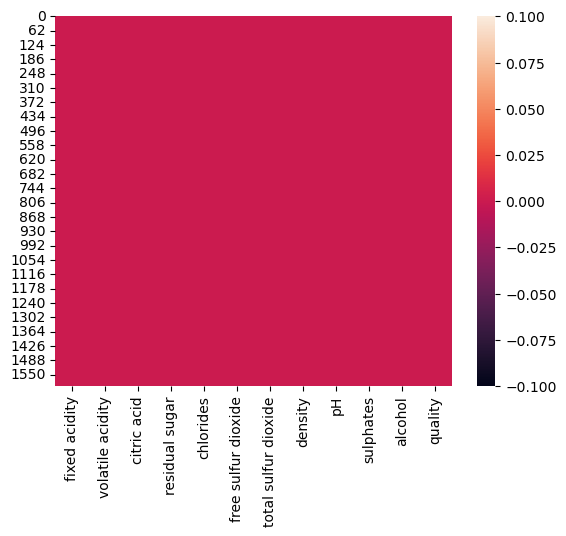

In [8]:
# Visualize the null values
sns.heatmap(df.isnull())

In [9]:
# checking number of unique values in each column
df.nunique().to_frame("No. of unique vlaues")

No. of unique vlaues
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6

In [ ]:
 '''hence we find quality has a 6 unique values and this a target column so we conclude this problem is classification problem.'''

In [10]:
# get the complete info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Data set have not a null values.

In [11]:
for value in df.columns:
    print(df[value].value_counts())
    print("--------------------------------------")

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
--------------------------------------
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
--------------------------------------
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
--------------------------------------
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
--------------------------------------
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1

In [12]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [13]:
# checking the duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
# Display the number of duplicate rows wise
num_duplicates = duplicate_rows.shape[0]
print(f"\nNumber of duplicate rows: {num_duplicates}")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  

In [14]:
# Get the index of duplicate rows
duplicate_indices = df[df.duplicated()].index
print(duplicate_indices)

Index([   4,   11,   27,   40,   65,   76,   91,   93,  102,  105,
       ...
       1520, 1522, 1557, 1560, 1561, 1563, 1564, 1567, 1581, 1596],
      dtype='int64', length=240)


In [13]:
# after the visualize i consists that in dataset have a duplicate rows.
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [15]:
# remove the duplicate rows
df.drop_duplicates(inplace=True)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1359 rows x 12 columns]

In [15]:
# removed the 240 duplicate rows(1599-1359)

In [16]:
# Describe the dataset
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [17]:
'''From the above code description we can observe the following
by summarising almost column is normal distributon except total sulfur dioxide
1.the counts of all the columns are same which means there are no missing values in the dataset.
2.mean>median(50%) then data is right skewness in total sulfur dioxide column.
3.By summarizing the data we can observe there is a huge difference b/w 75% and max in (residual_sugar,free sulfur dioxide and
and total sulfur dioxide) hence there are outliers present in the data.
4.we can also notice the standard deviation,min(25%),values from his describe method
'''

'From the above code description we can observe the following\nby summarising almost column is normal distributon except total sulfur dioxide\n1.the counts of all the columns are same which means there are no missing values in the dataset.\n2.mean>median(50%) then data is right skewness in total sulfur dioxide column.\n3.By summarizing the data we can observe there is a huge difference b/w 75% and max in (residual_sugar,free sulfur dioxide and\nand total sulfur dioxide) hence there are outliers present in the data.\n4.we can also notice the standard deviation,min(25%),values from his describe method\n'

In [17]:
# # checking the list of count of target
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Check Outliers and remove by z score method

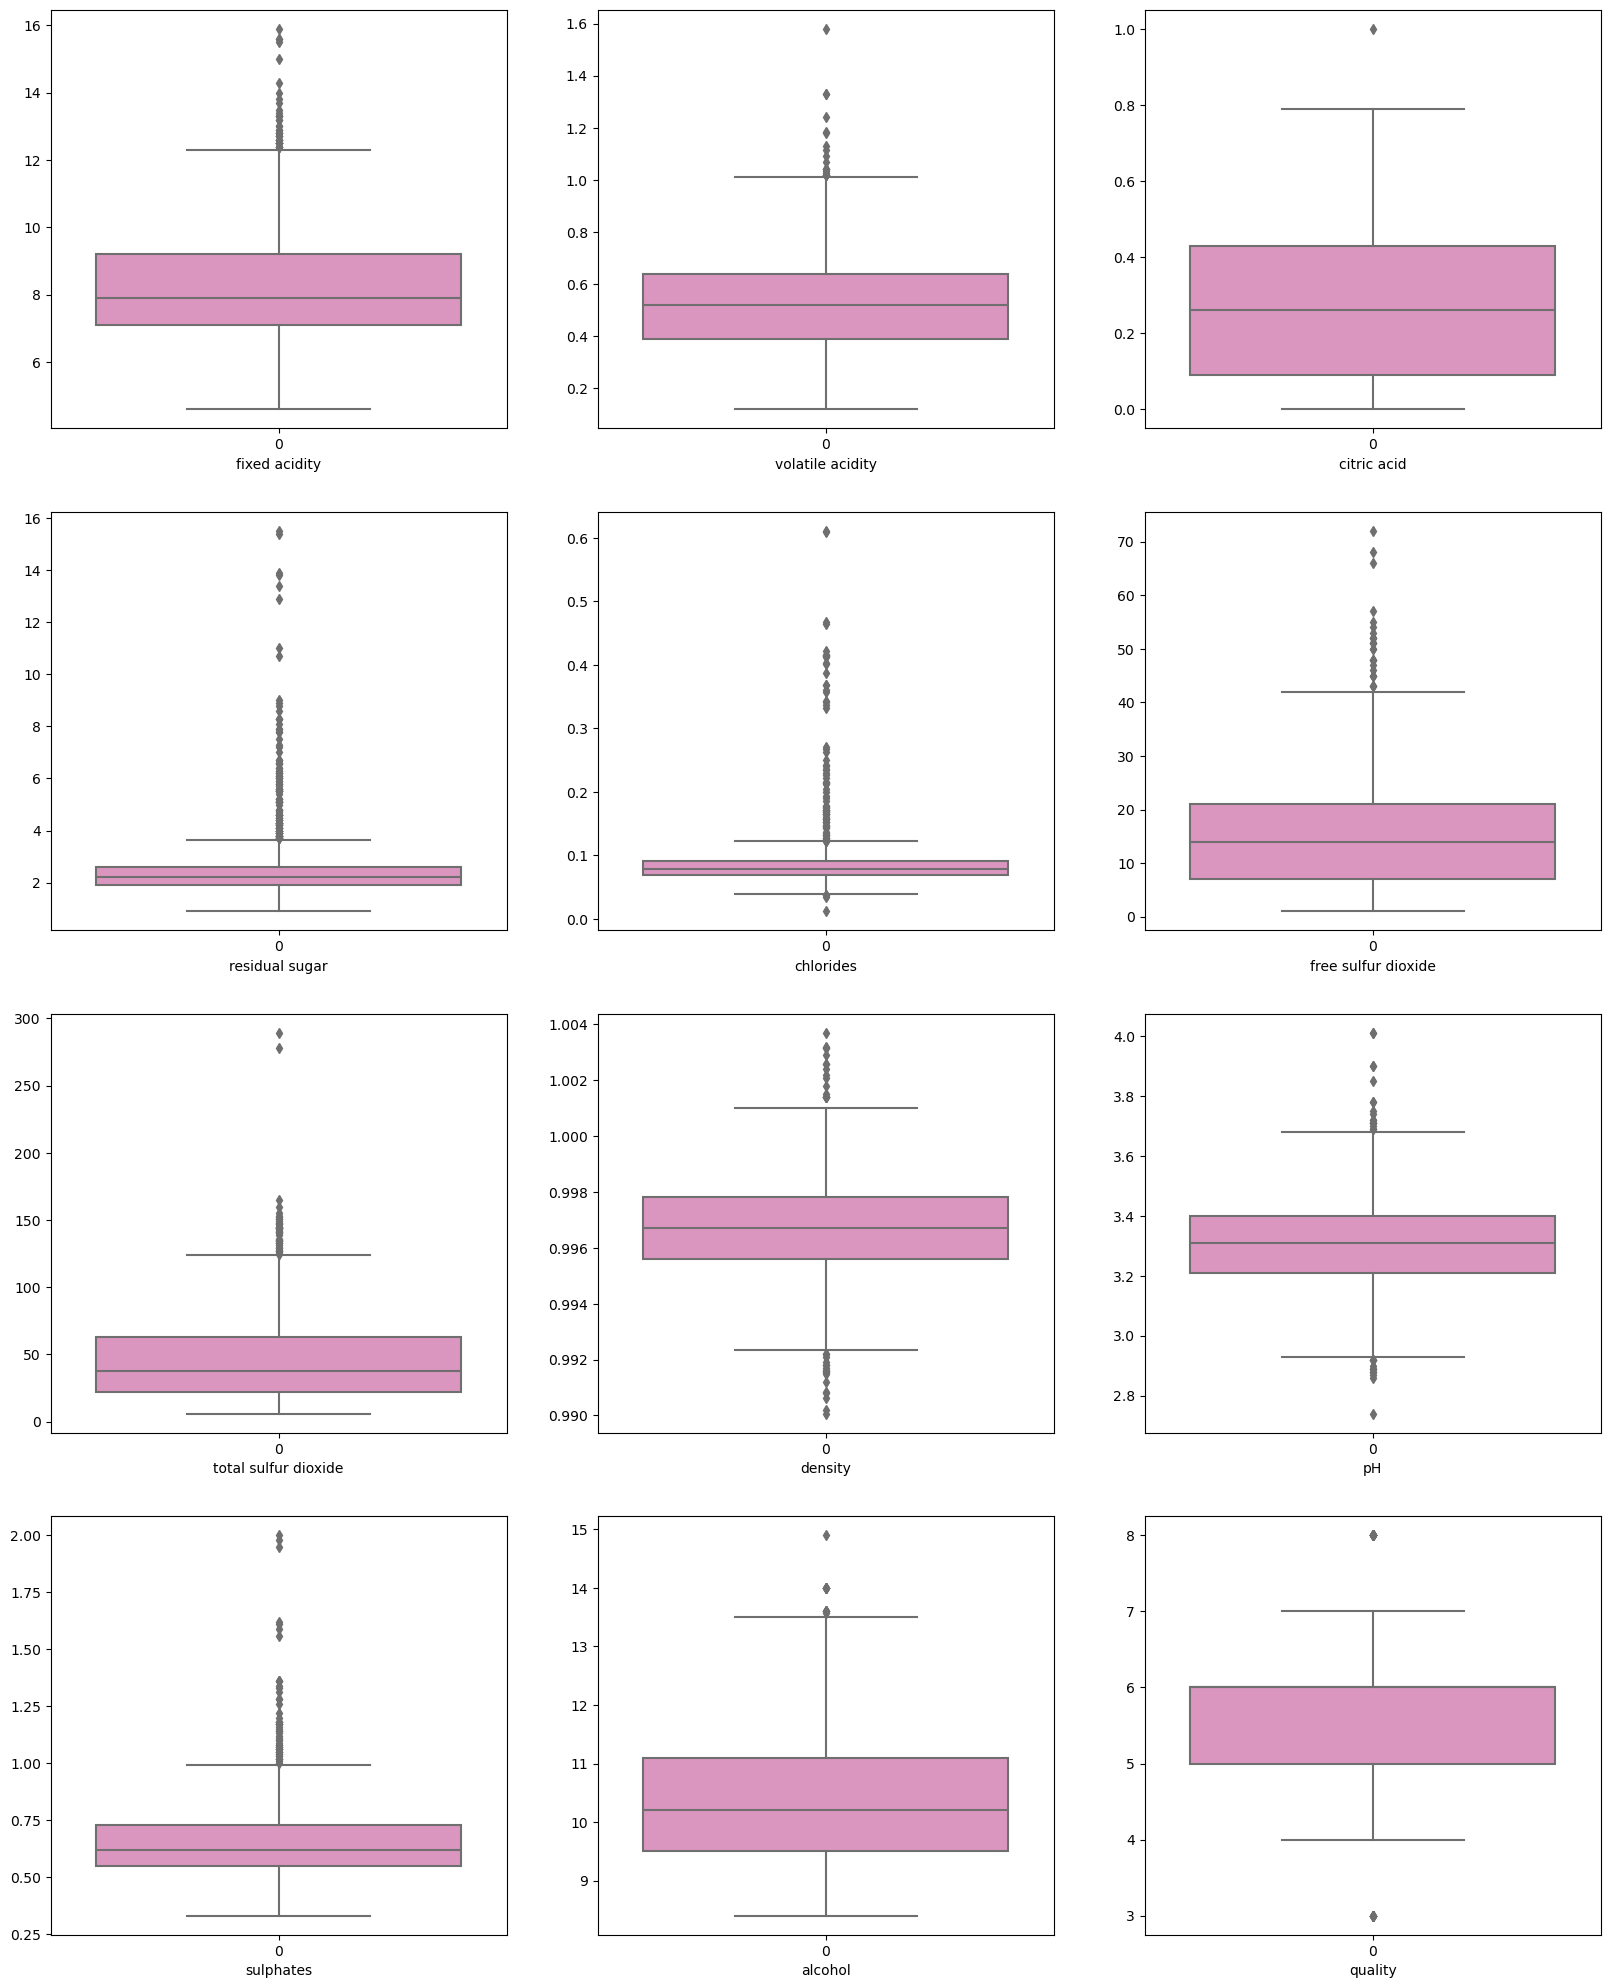

In [18]:
# check the outliers by plotting boxplot
plt.figure(figsize=(20,25))
p=1
for column in df:
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(df[column],palette='Set2_r')
        plt.xlabel(column)
    p +=1
plt.show()

In [19]:
''' so we have found outlier in all columns
So removing the outliers using the zscore and IQR techniques before building the model and 
selected best one.
'''
from scipy.stats import zscore
out_features=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
z=np.abs(zscore(out_features))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.524431          0.932000     1.393258        0.461157   0.245623   
1          0.294063          1.915800     1.393258        0.056665   0.200094   
2          0.294063          1.259934     1.188617        0.165259   0.078535   
3          1.664067          1.363534     1.471711        0.461157   0.265883   
5          0.524431          0.713378     1.393258        0.535132   0.265883   
...             ...               ...          ...             ...        ...   
1593       0.869983          0.494756     0.983977        0.461157   0.407702   
1594       1.215536          0.385444     0.983977        0.387183   0.038015   
1595       1.388312          0.112167     0.881656        0.239233   0.529261   
1597       1.388312          0.631395     0.779336        0.387183   0.265883   
1598       1.330720          1.199567     1.011270        0.796410   0.427962   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.468554              0.384050  0.584003  1.291872   
1                0.872003              0.604073  0.048737  0.708395   
2                0.085537              0.214813  0.155790  0.321247   
3                0.105971              0.394471  0.691057  0.966495   
5                0.277045              0.204391  0.584003  1.291872   
...                   ...                   ...       ...       ...   
1593             1.159265              0.264277  0.106490  0.711149   
1594             1.542281              0.084619  0.968269  0.904724   
1595             2.212559              0.124983  0.850510  1.356397   
1597             1.542281              0.084619  0.663167  1.679021   
1598             0.201725              0.144505  0.652461  0.517575   

      sulphates   alcohol  
0      0.578561  0.954374  
1      0.124822  0.584575  
2      0.051024  0.584575  
3      0.461331  0.584575  
5      0.578561  0.954374  
...         ...       ...  
1593   0.945435  0.861924  
1594   0.461331  0.062574  
1595   0.593744  0.709723  
1597   0.300667  0.214775  
1598   0.007591  0.524824  

[1359 rows x 11 columns]

In [20]:
np.where(z>3)

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
          41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
          99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
         150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
         252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
         363,  385,  385,  393,  408,  420,  420,  433,  448,  473,  483,
         483,  485,  485,  492,  506,  510,  513,  516,  528,  534,  555,
         562,  562,  564,  565,  565,  565,  582,  582,  592,  597,  599,
         602,  626,  627,  632,  652,  671,  672,  687,  710,  722,  764,
         764,  781,  786,  791,  792,  838,  866,  888,  895,  895,  912,
         918,  918,  920,  920,  945,  948,  963,  985,  994, 1003, 1013,
        1049, 1052, 1060, 1060, 1060, 1073, 1081, 1081, 1082, 1082, 1103,
        1106, 1107, 1117, 1121, 1123, 1123, 1125, 1151, 1159, 1162, 1165,
        1216, 1216, 1216, 1250, 1250, 

In [21]:
df1=df[(z<3).all(axis=1)]
df1.shape

(1239, 12)

In [22]:
df1['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [23]:
print("Data Loss Percentage ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage  8.830022075055188


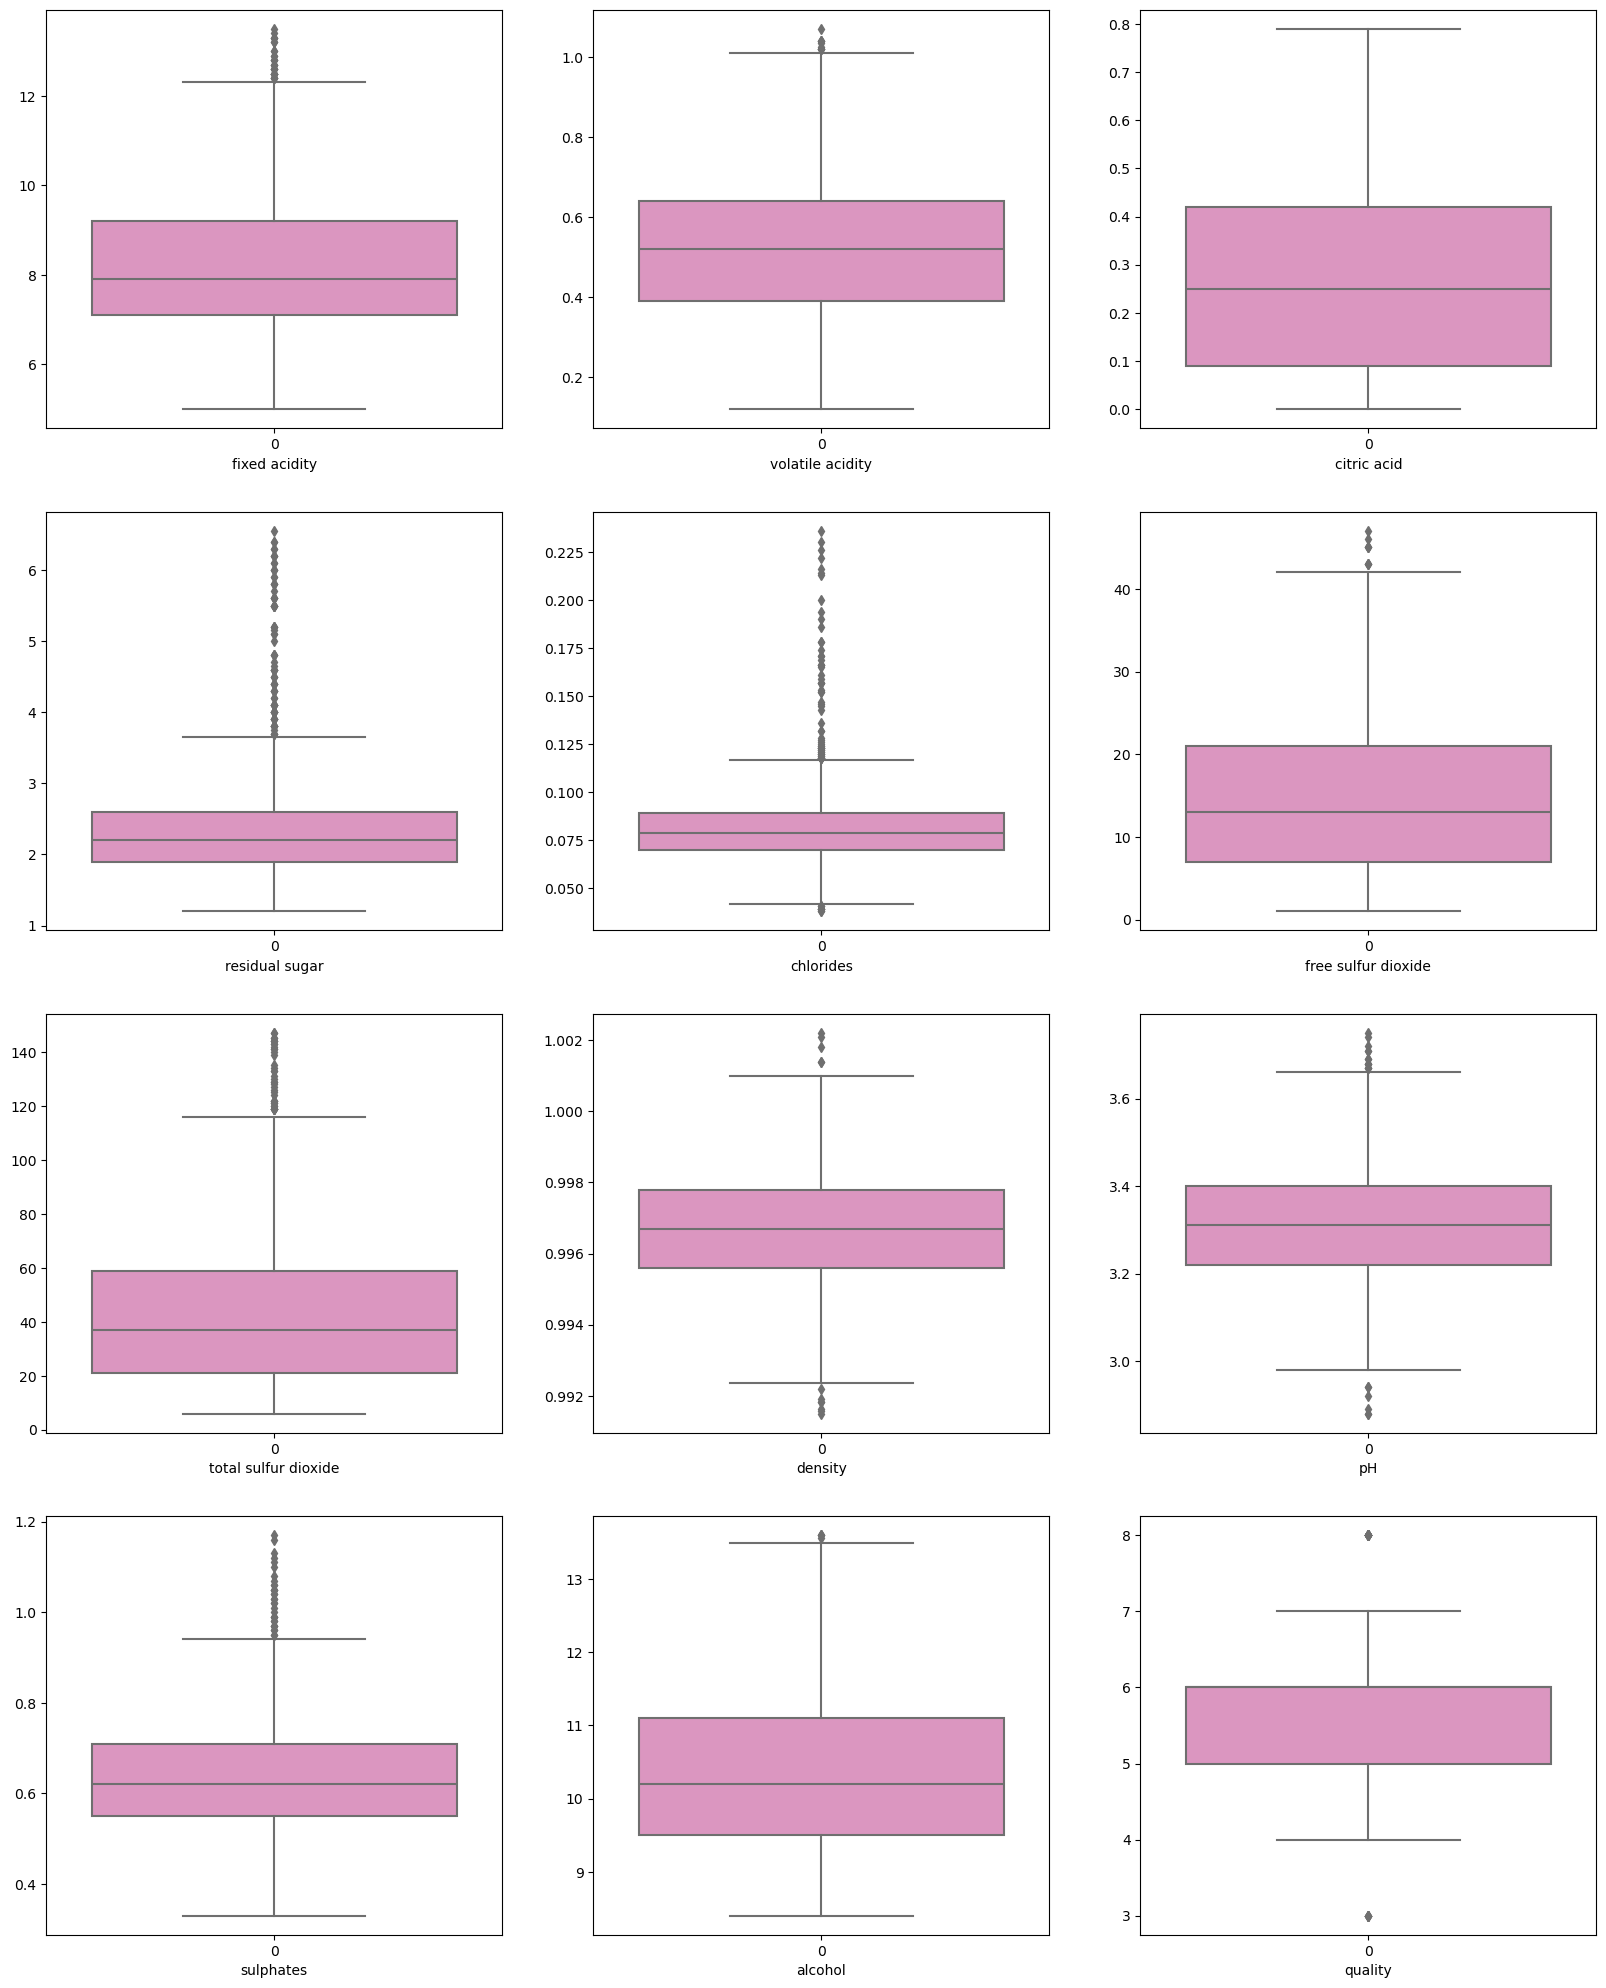

In [27]:
# check the outliers by plotting boxplot after remove outliers by zscore method
plt.figure(figsize=(20,25))
p=1
for column in df1:
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(df1[column],palette='Set2_r')
        plt.xlabel(column)
    p +=1
plt.show()

# Check Outliers and remove by IQR method

In [28]:
# check with IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
df_cleaned

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1005 rows x 12 columns]

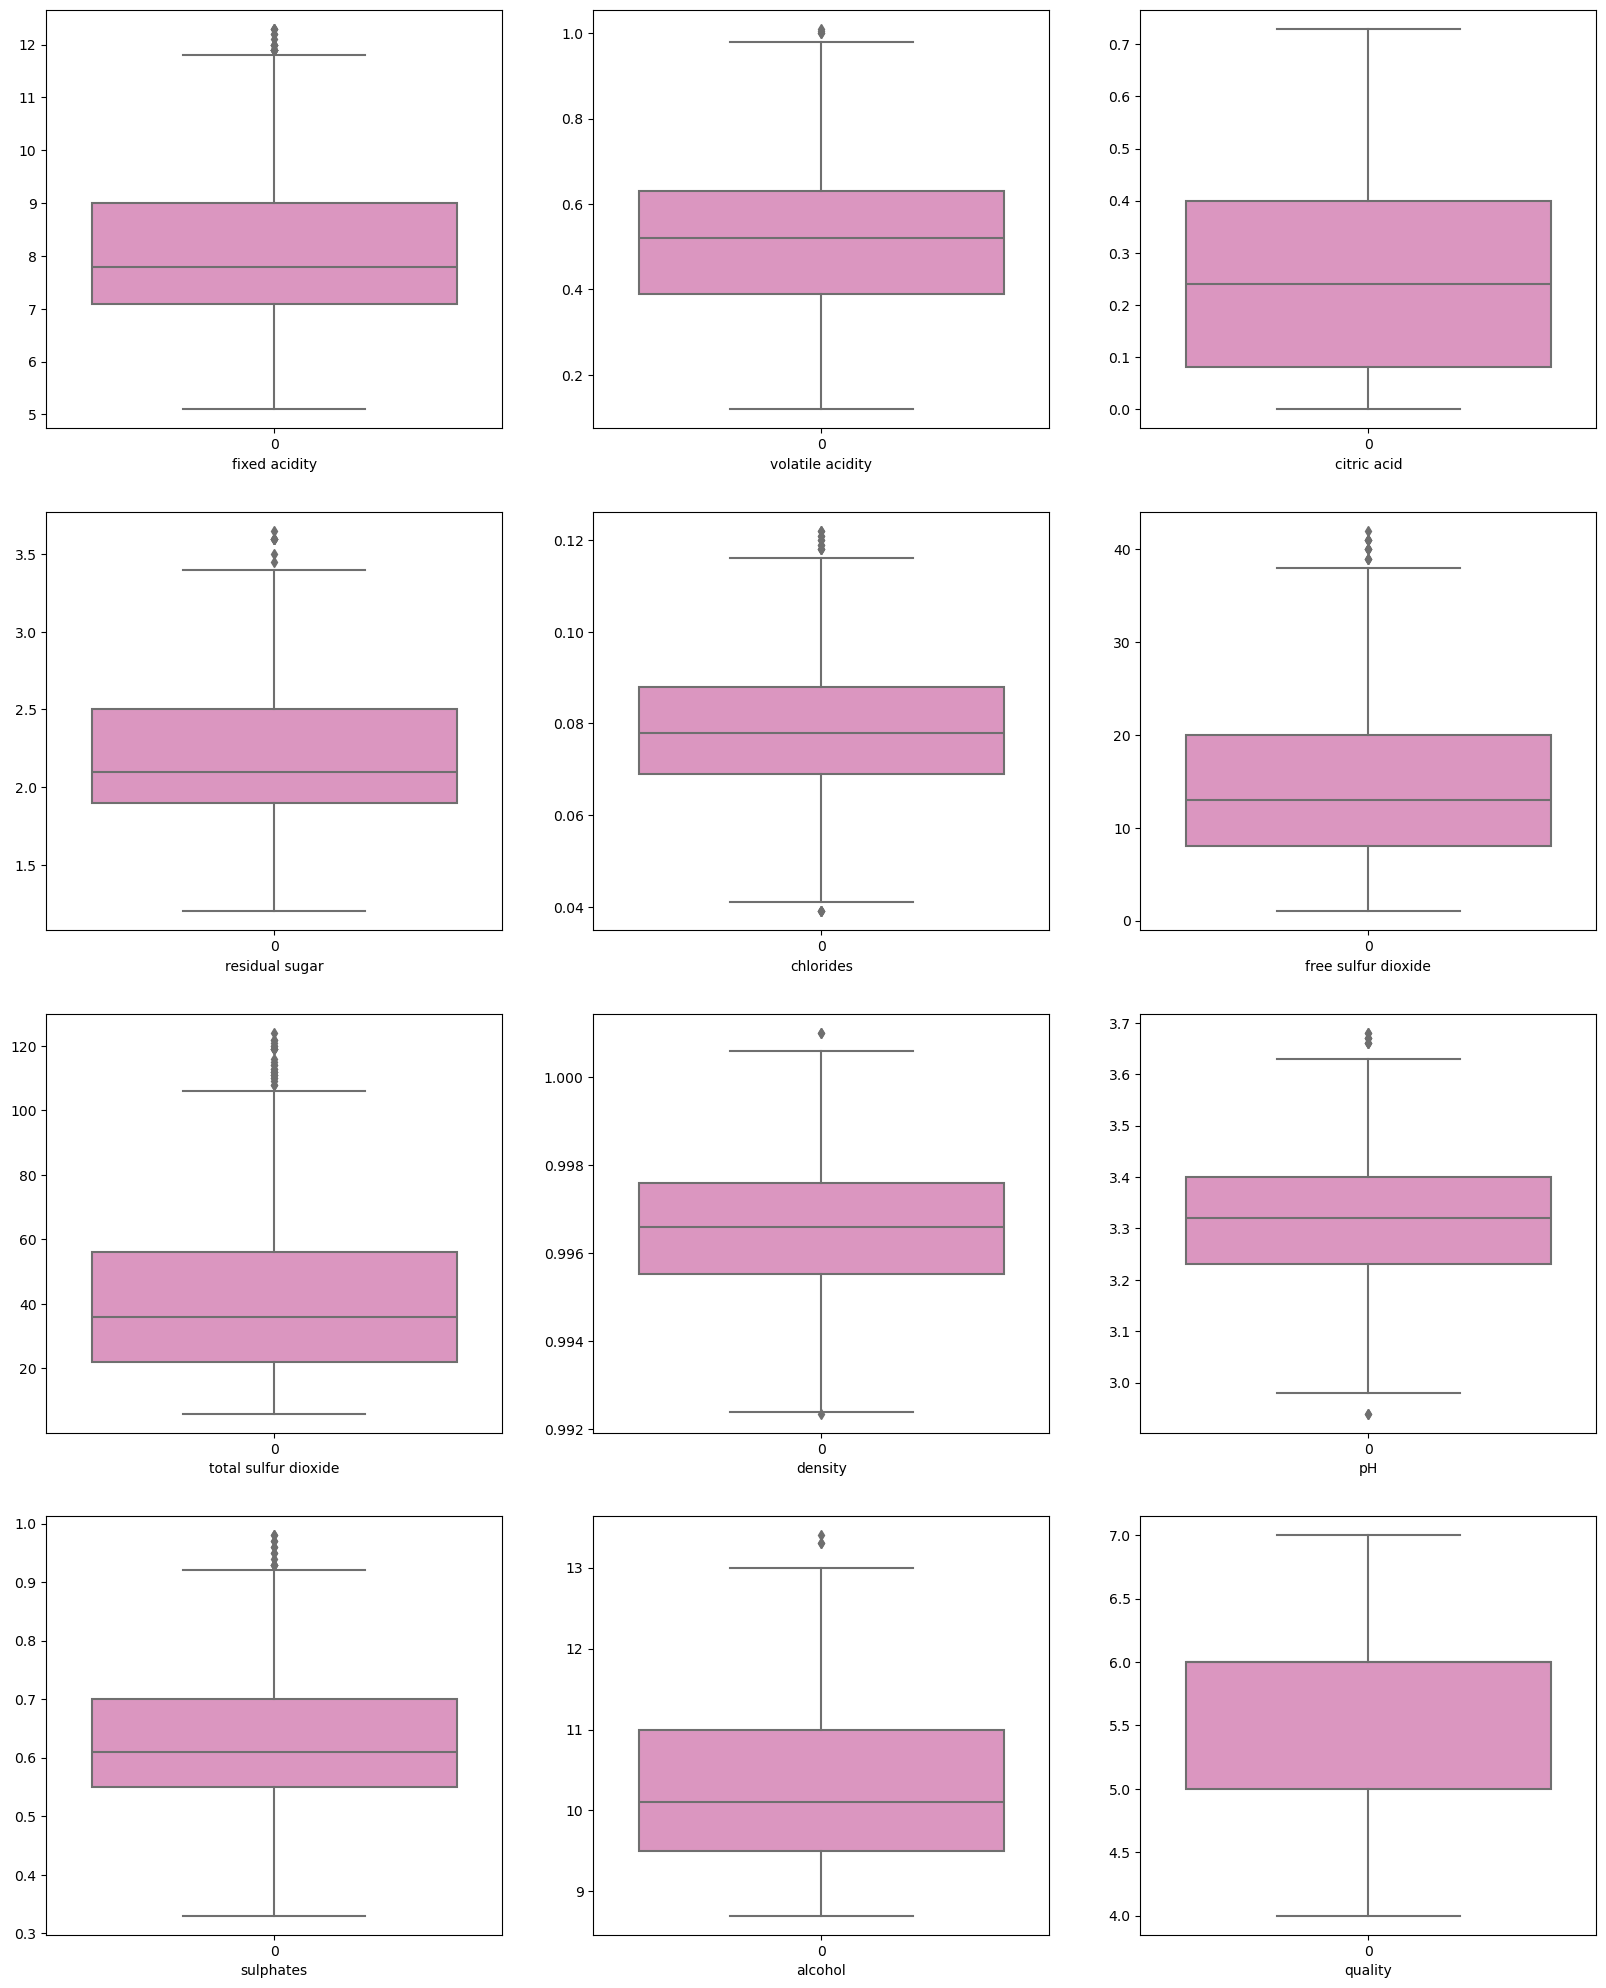

In [30]:
# check the outliers by plotting boxplot after remove outlier by IQR method
plt.figure(figsize=(20,25))
p=1
for column in df_cleaned:
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(df_cleaned[column],palette='Set2_r')
        plt.xlabel(column)
    p +=1
plt.show()

In [31]:
df_cleaned['quality'].unique()

array([5, 6, 7, 4], dtype=int64)

# Checked the skewness of data

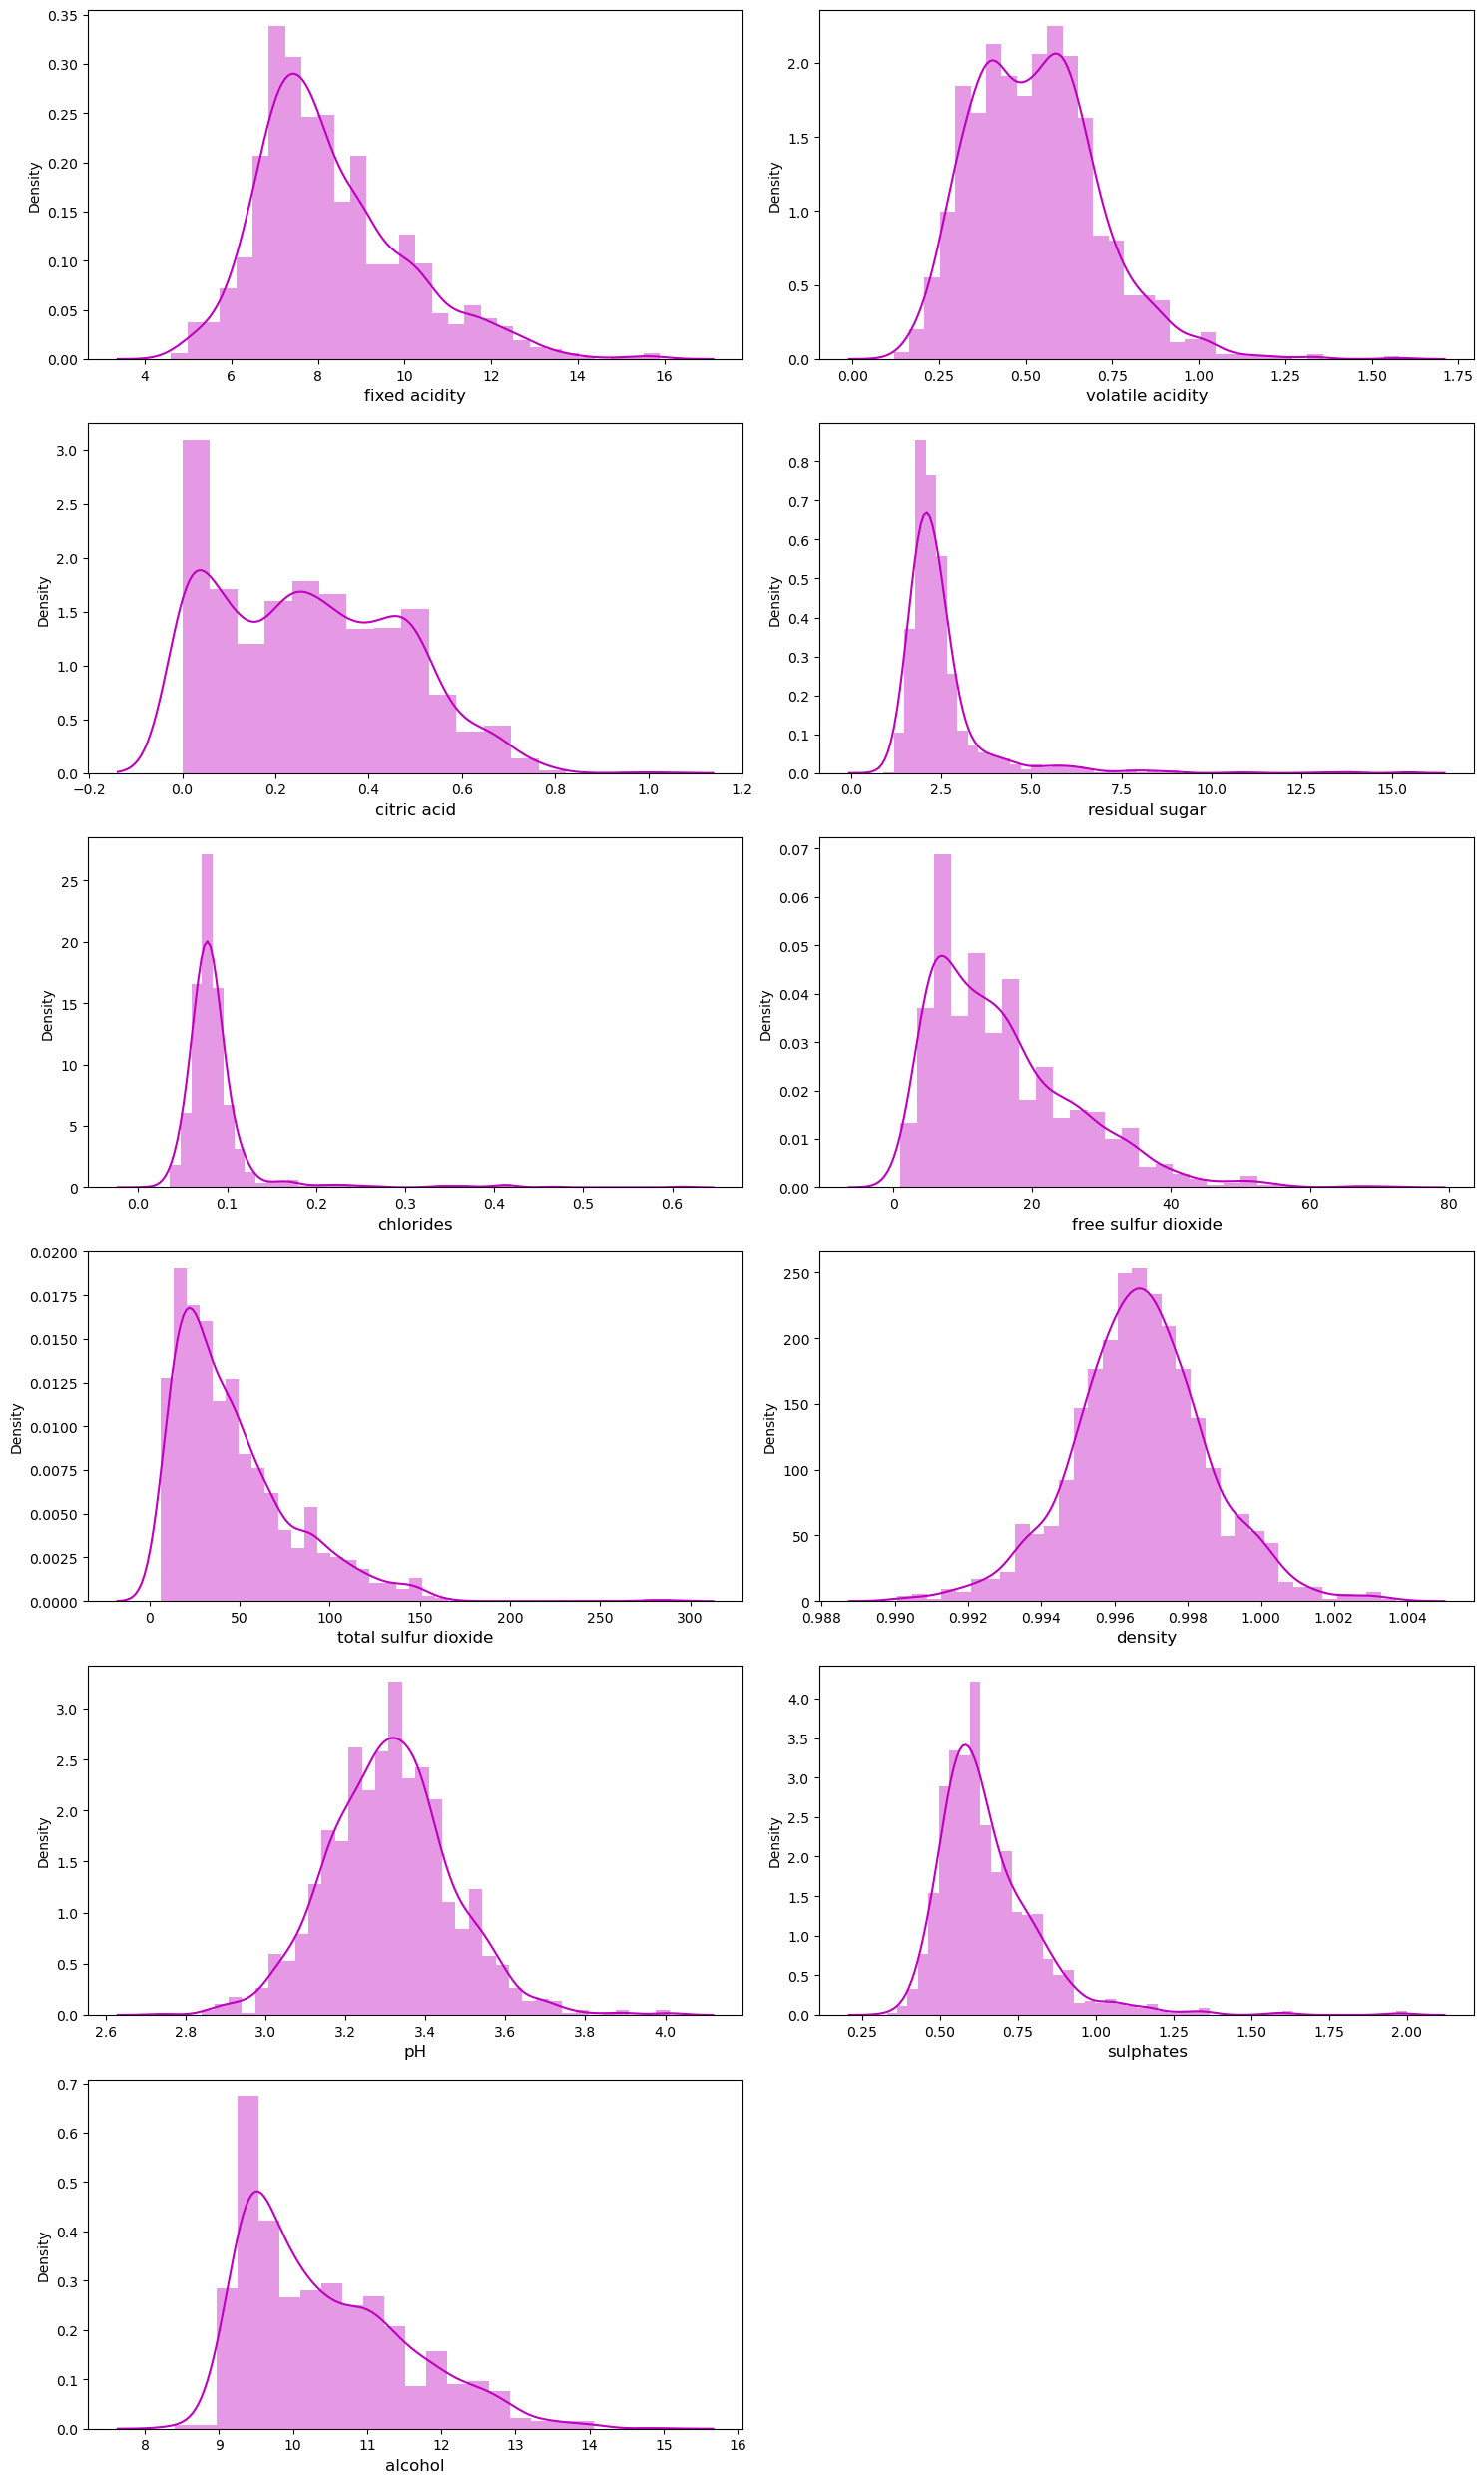

In [32]:
# check how the data distribution in column
plt.figure(figsize=(15, 25),facecolor="white")
plotnumber=1
for col in df.columns[:-1]:
    if(plotnumber<=11):
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber +=1
plt.tight_layout()

In [33]:
# checking the skewness
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

In [34]:
# Removing the skewness using the squareroot method
df["chlorides"]=np.sqrt(df["chlorides"])

In [35]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               3.667649
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

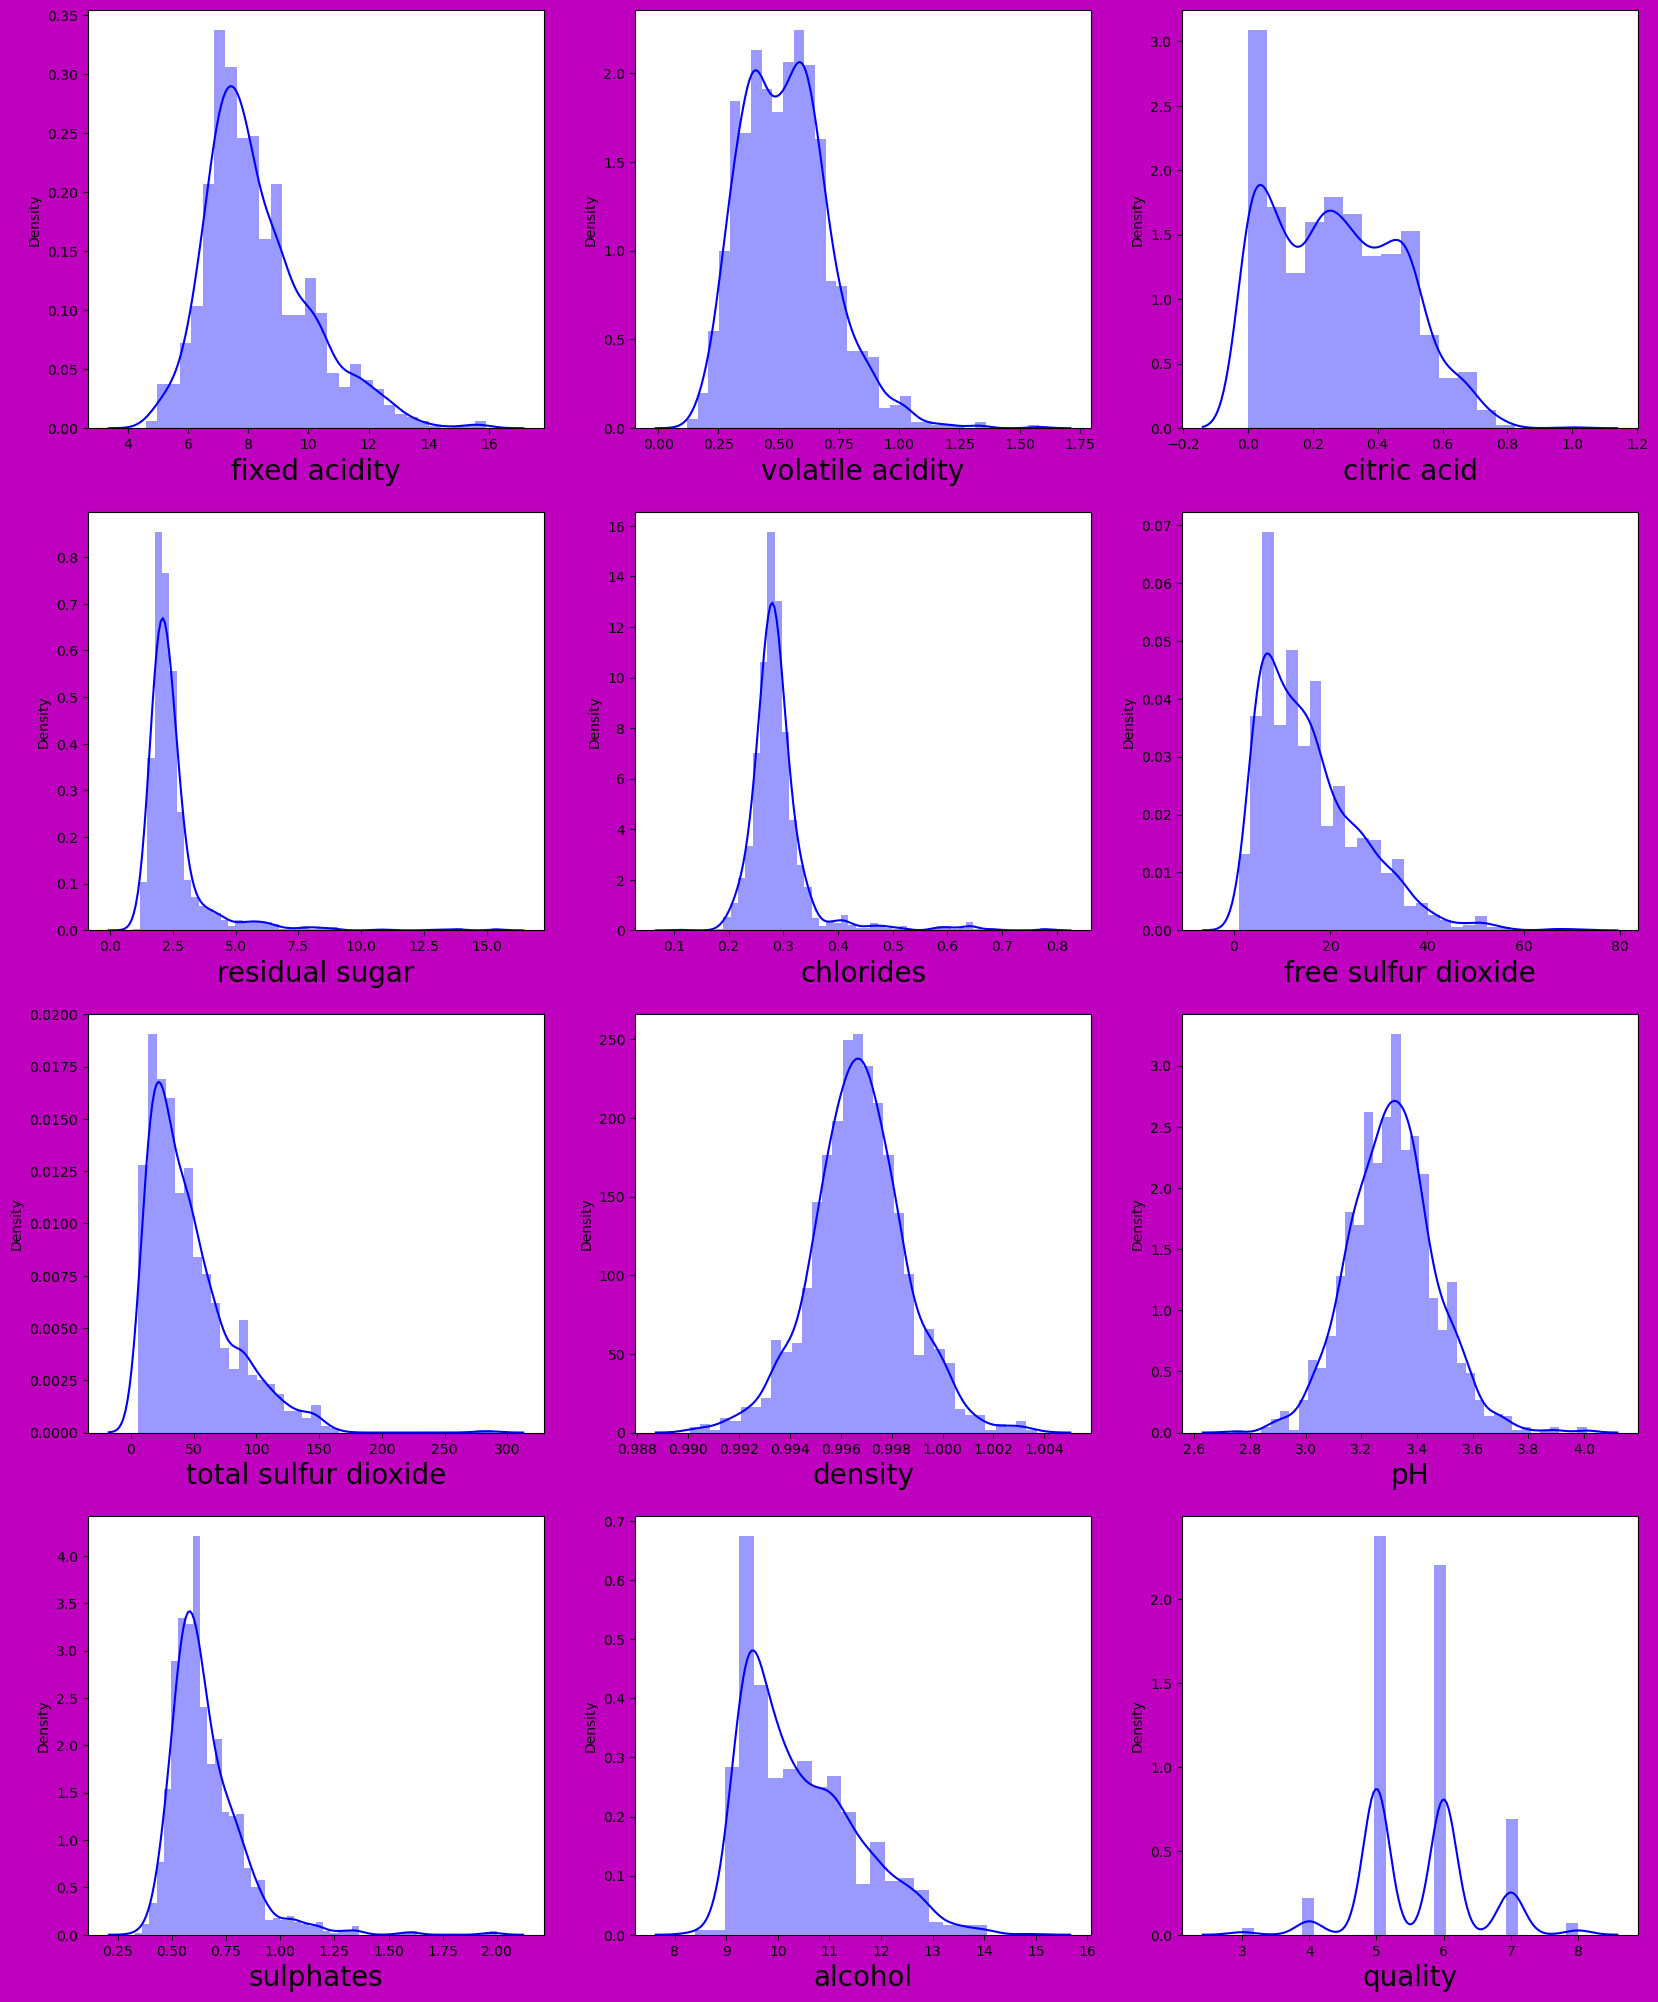

In [36]:
# checking how the data has been distributed in each column
plt.figure(figsize=(20,25),facecolor="m")
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

# Checked skewness on outliers remove data by zscore method

In [37]:
df1.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          2.371572
chlorides               2.480193
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

In [38]:
df1["chlorides"]=np.sqrt(df1["chlorides"])

In [39]:
df1.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          2.371572
chlorides               1.491853
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 0.229533
dtype: float64

# Checked skewness on outliers remove data by IQR method

In [45]:
df_cleaned.skew()

fixed acidity           0.705900
volatile acidity        0.301515
citric acid             0.303614
residual sugar          0.595769
chlorides               0.224859
free sulfur dioxide     0.828408
total sulfur dioxide    0.979970
density                 0.061839
pH                      0.091424
sulphates               0.632062
alcohol                 0.763982
quality                 0.223224
dtype: float64

# Checked correlation

In [46]:
show_cor=df.corr()

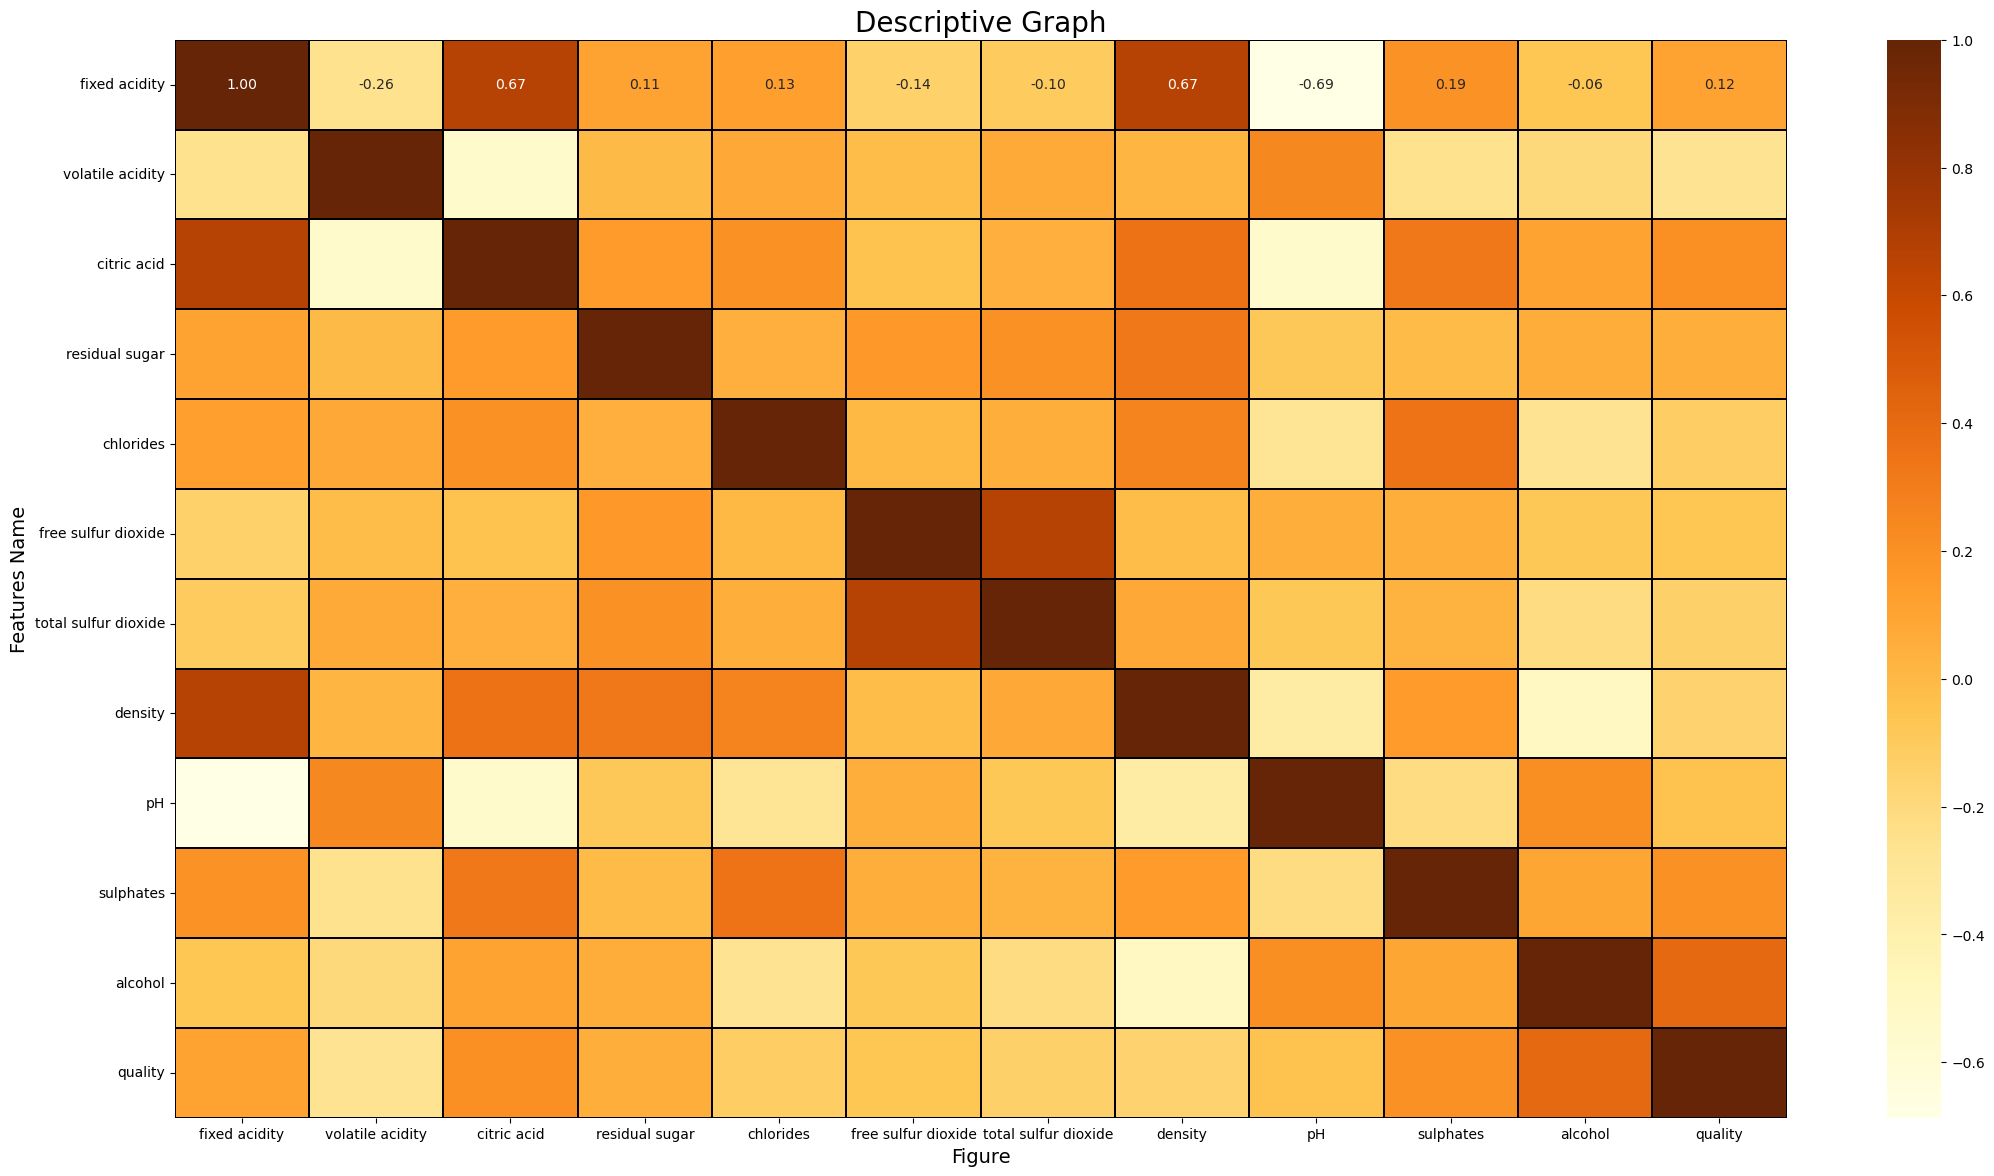

In [52]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='black',cmap="YlOrBr")
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features Name',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

In [48]:
show_cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.157202
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

In [49]:
# convert the target column in binary classification 1 or 0
df['quality'] = np.where(df['quality'] > 6, 1, 0)

[Text(0.5, 1.0, 'See the Alcohol Distribution')]

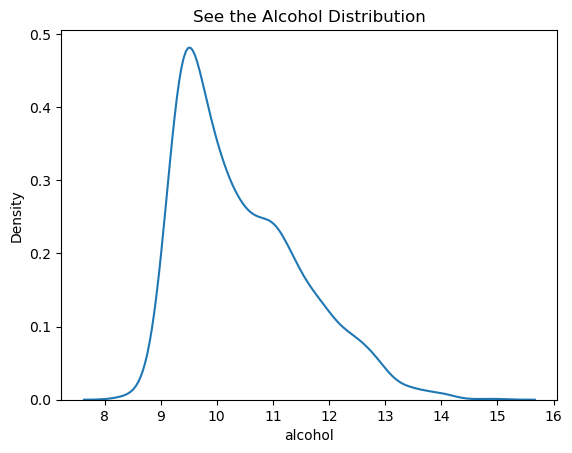

In [54]:
# Visualization Univariate
sns.kdeplot(data=df, x="alcohol").set(title="See the Alcohol Distribution")

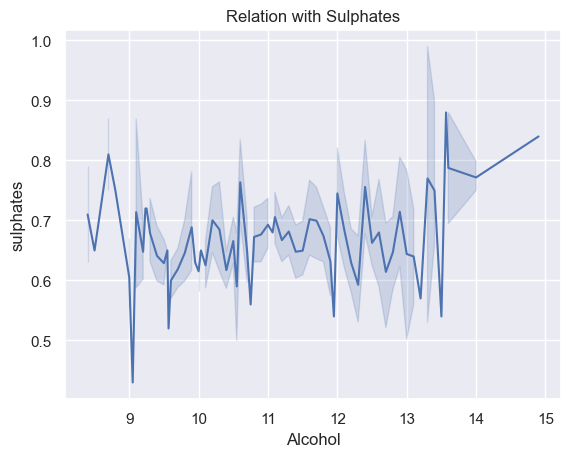

In [77]:
# sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="alcohol", y="sulphates").set(title="Relation with Sulphates",xlabel='Alcohol')
plt.show()

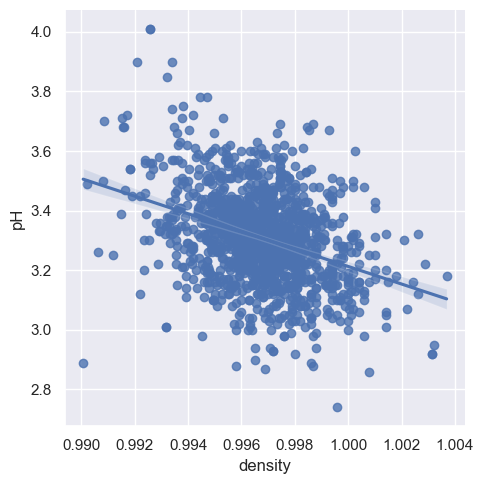

In [75]:
sns.lmplot(x='density',y='pH',data=df,palette='mako')

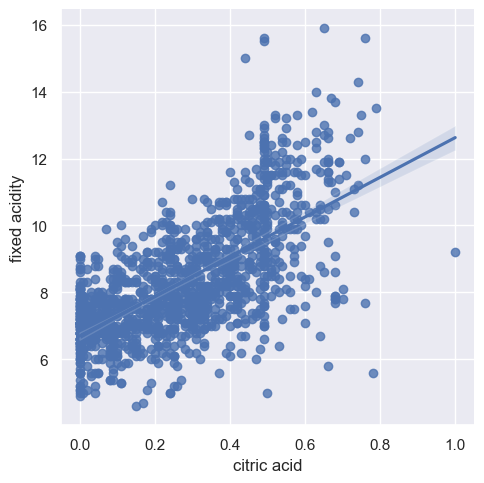

In [79]:
sns.lmplot(x='citric acid',y='fixed acidity',data=df,palette='colorblind')

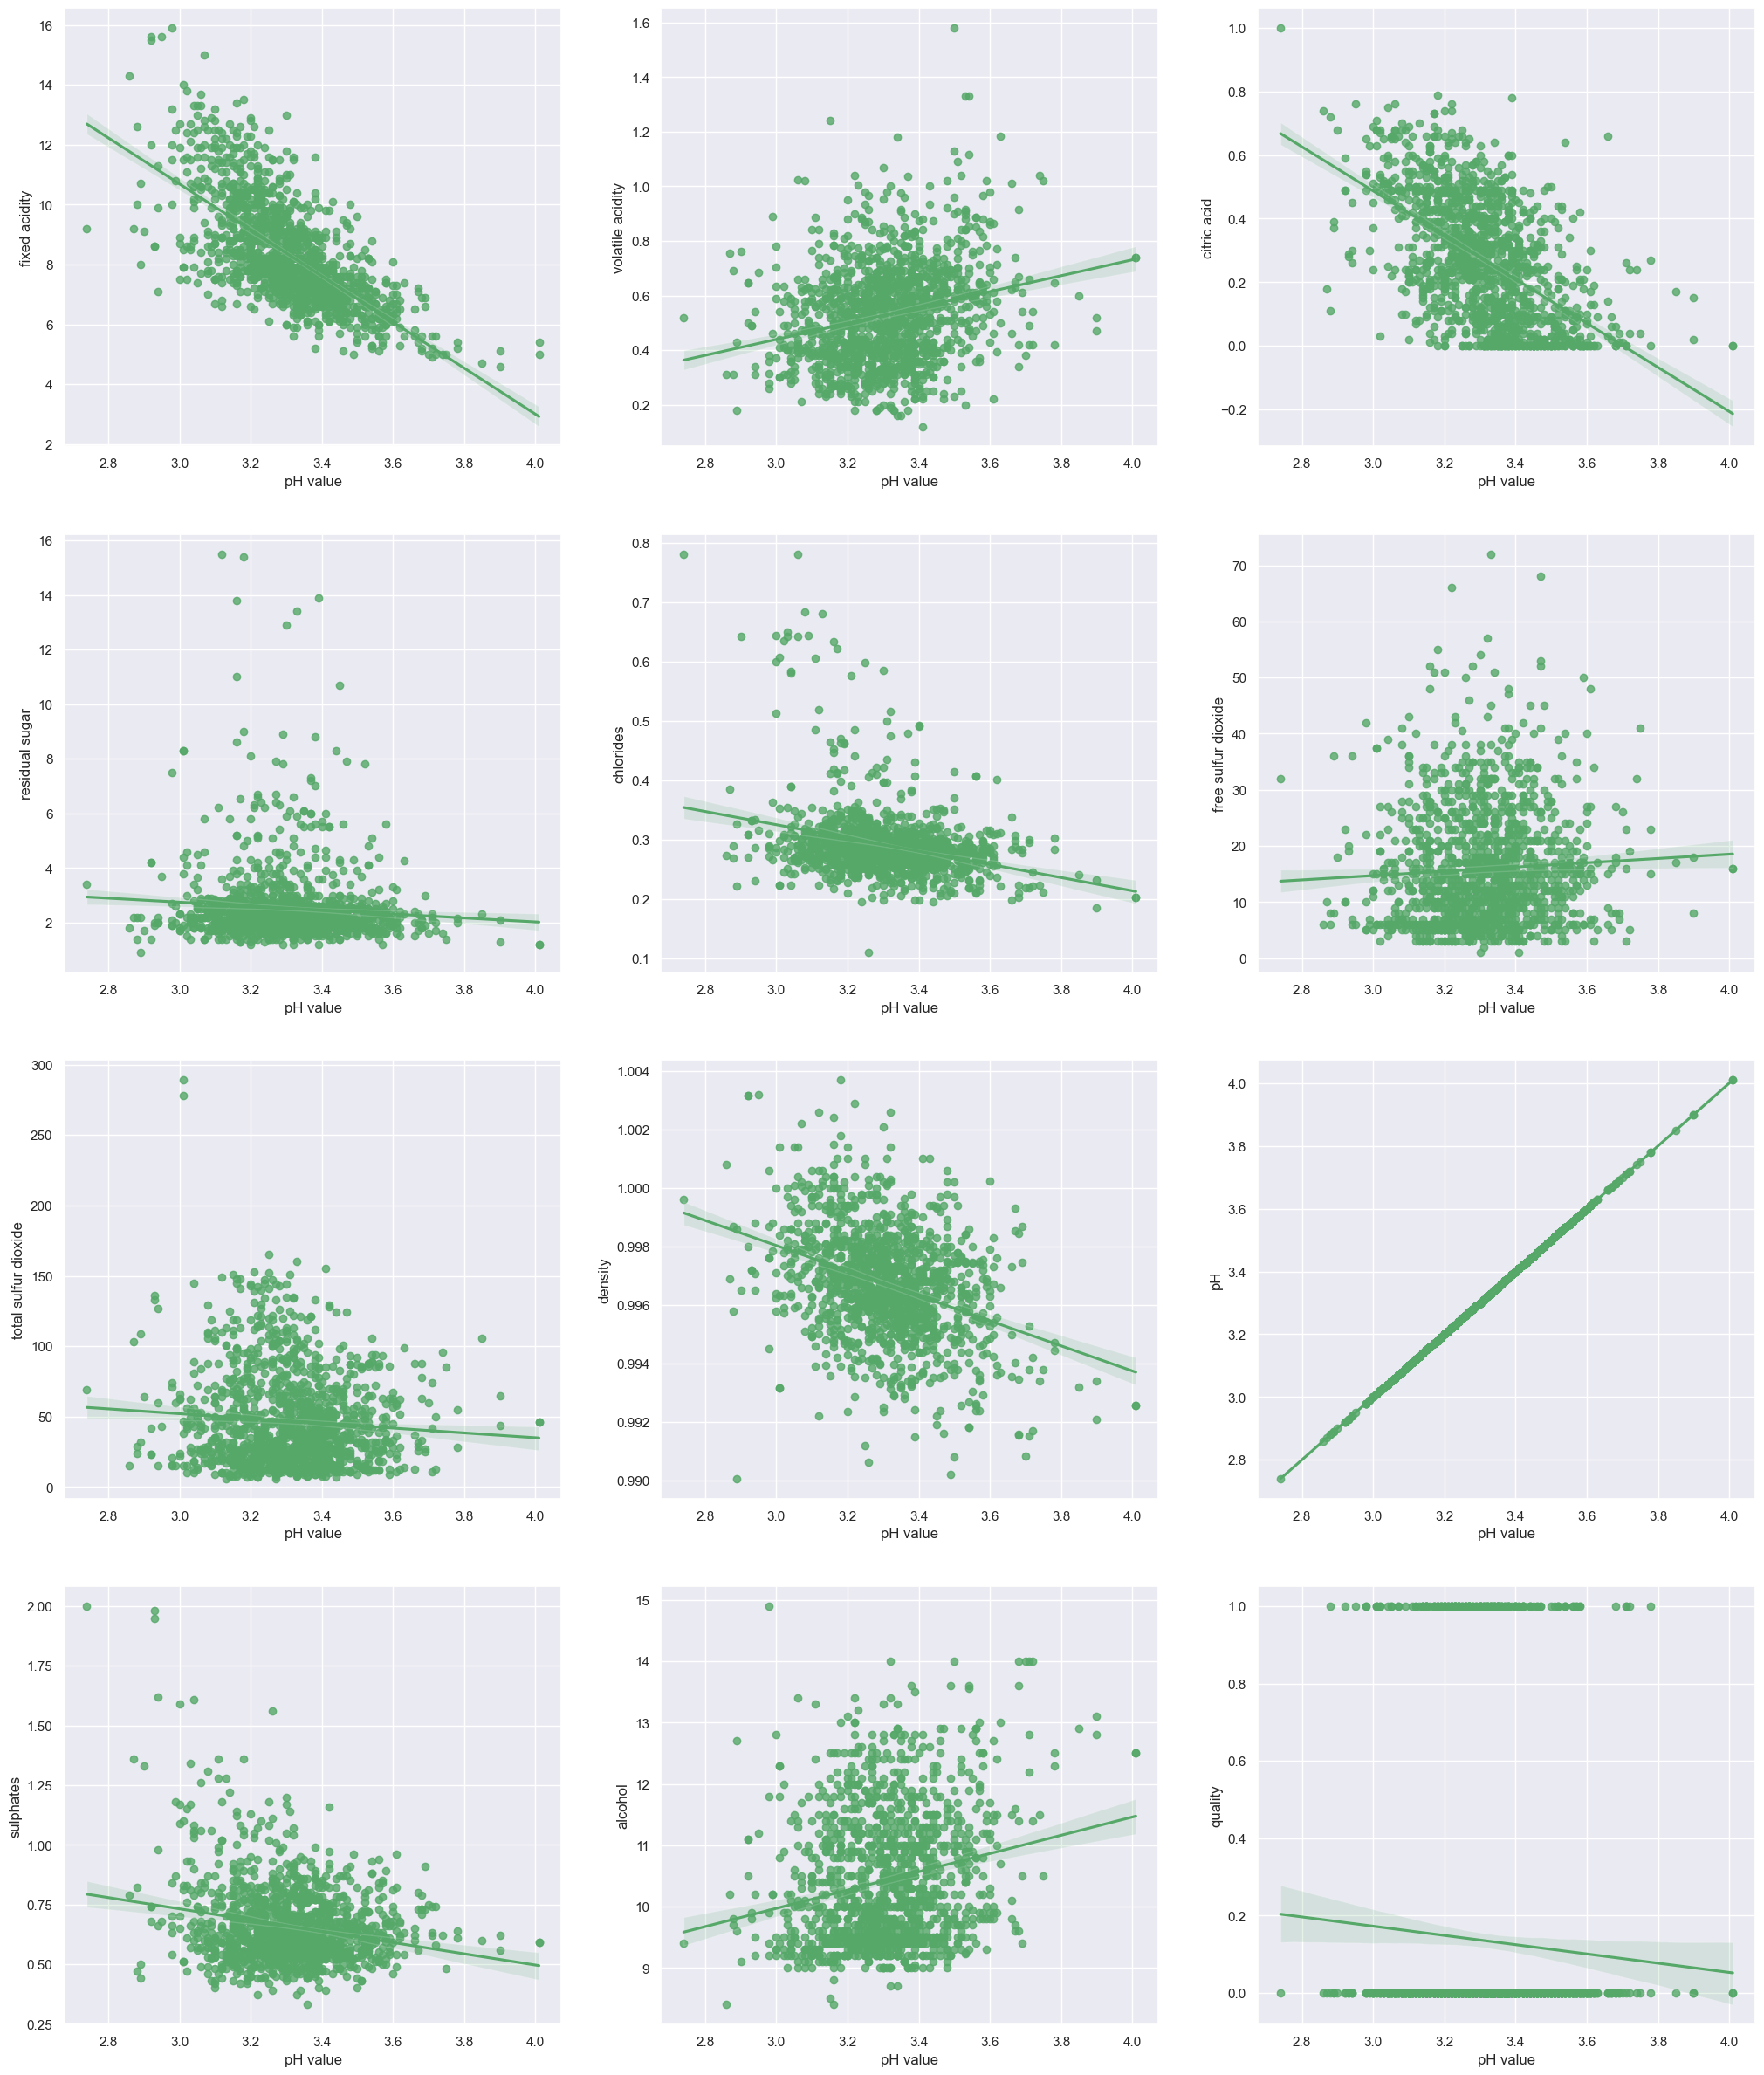

In [84]:
plt.figure(figsize=(25,30))
column=1
for col in df:
    if column<=12:
        plt.subplot(4,3,column)
        sns.regplot(x='pH',y=col,data=df,color='g')
        plt.xlabel('pH value')
        plt.ylabel(col)
    column +=1
plt.show()

<Figure size 2500x3000 with 0 Axes>

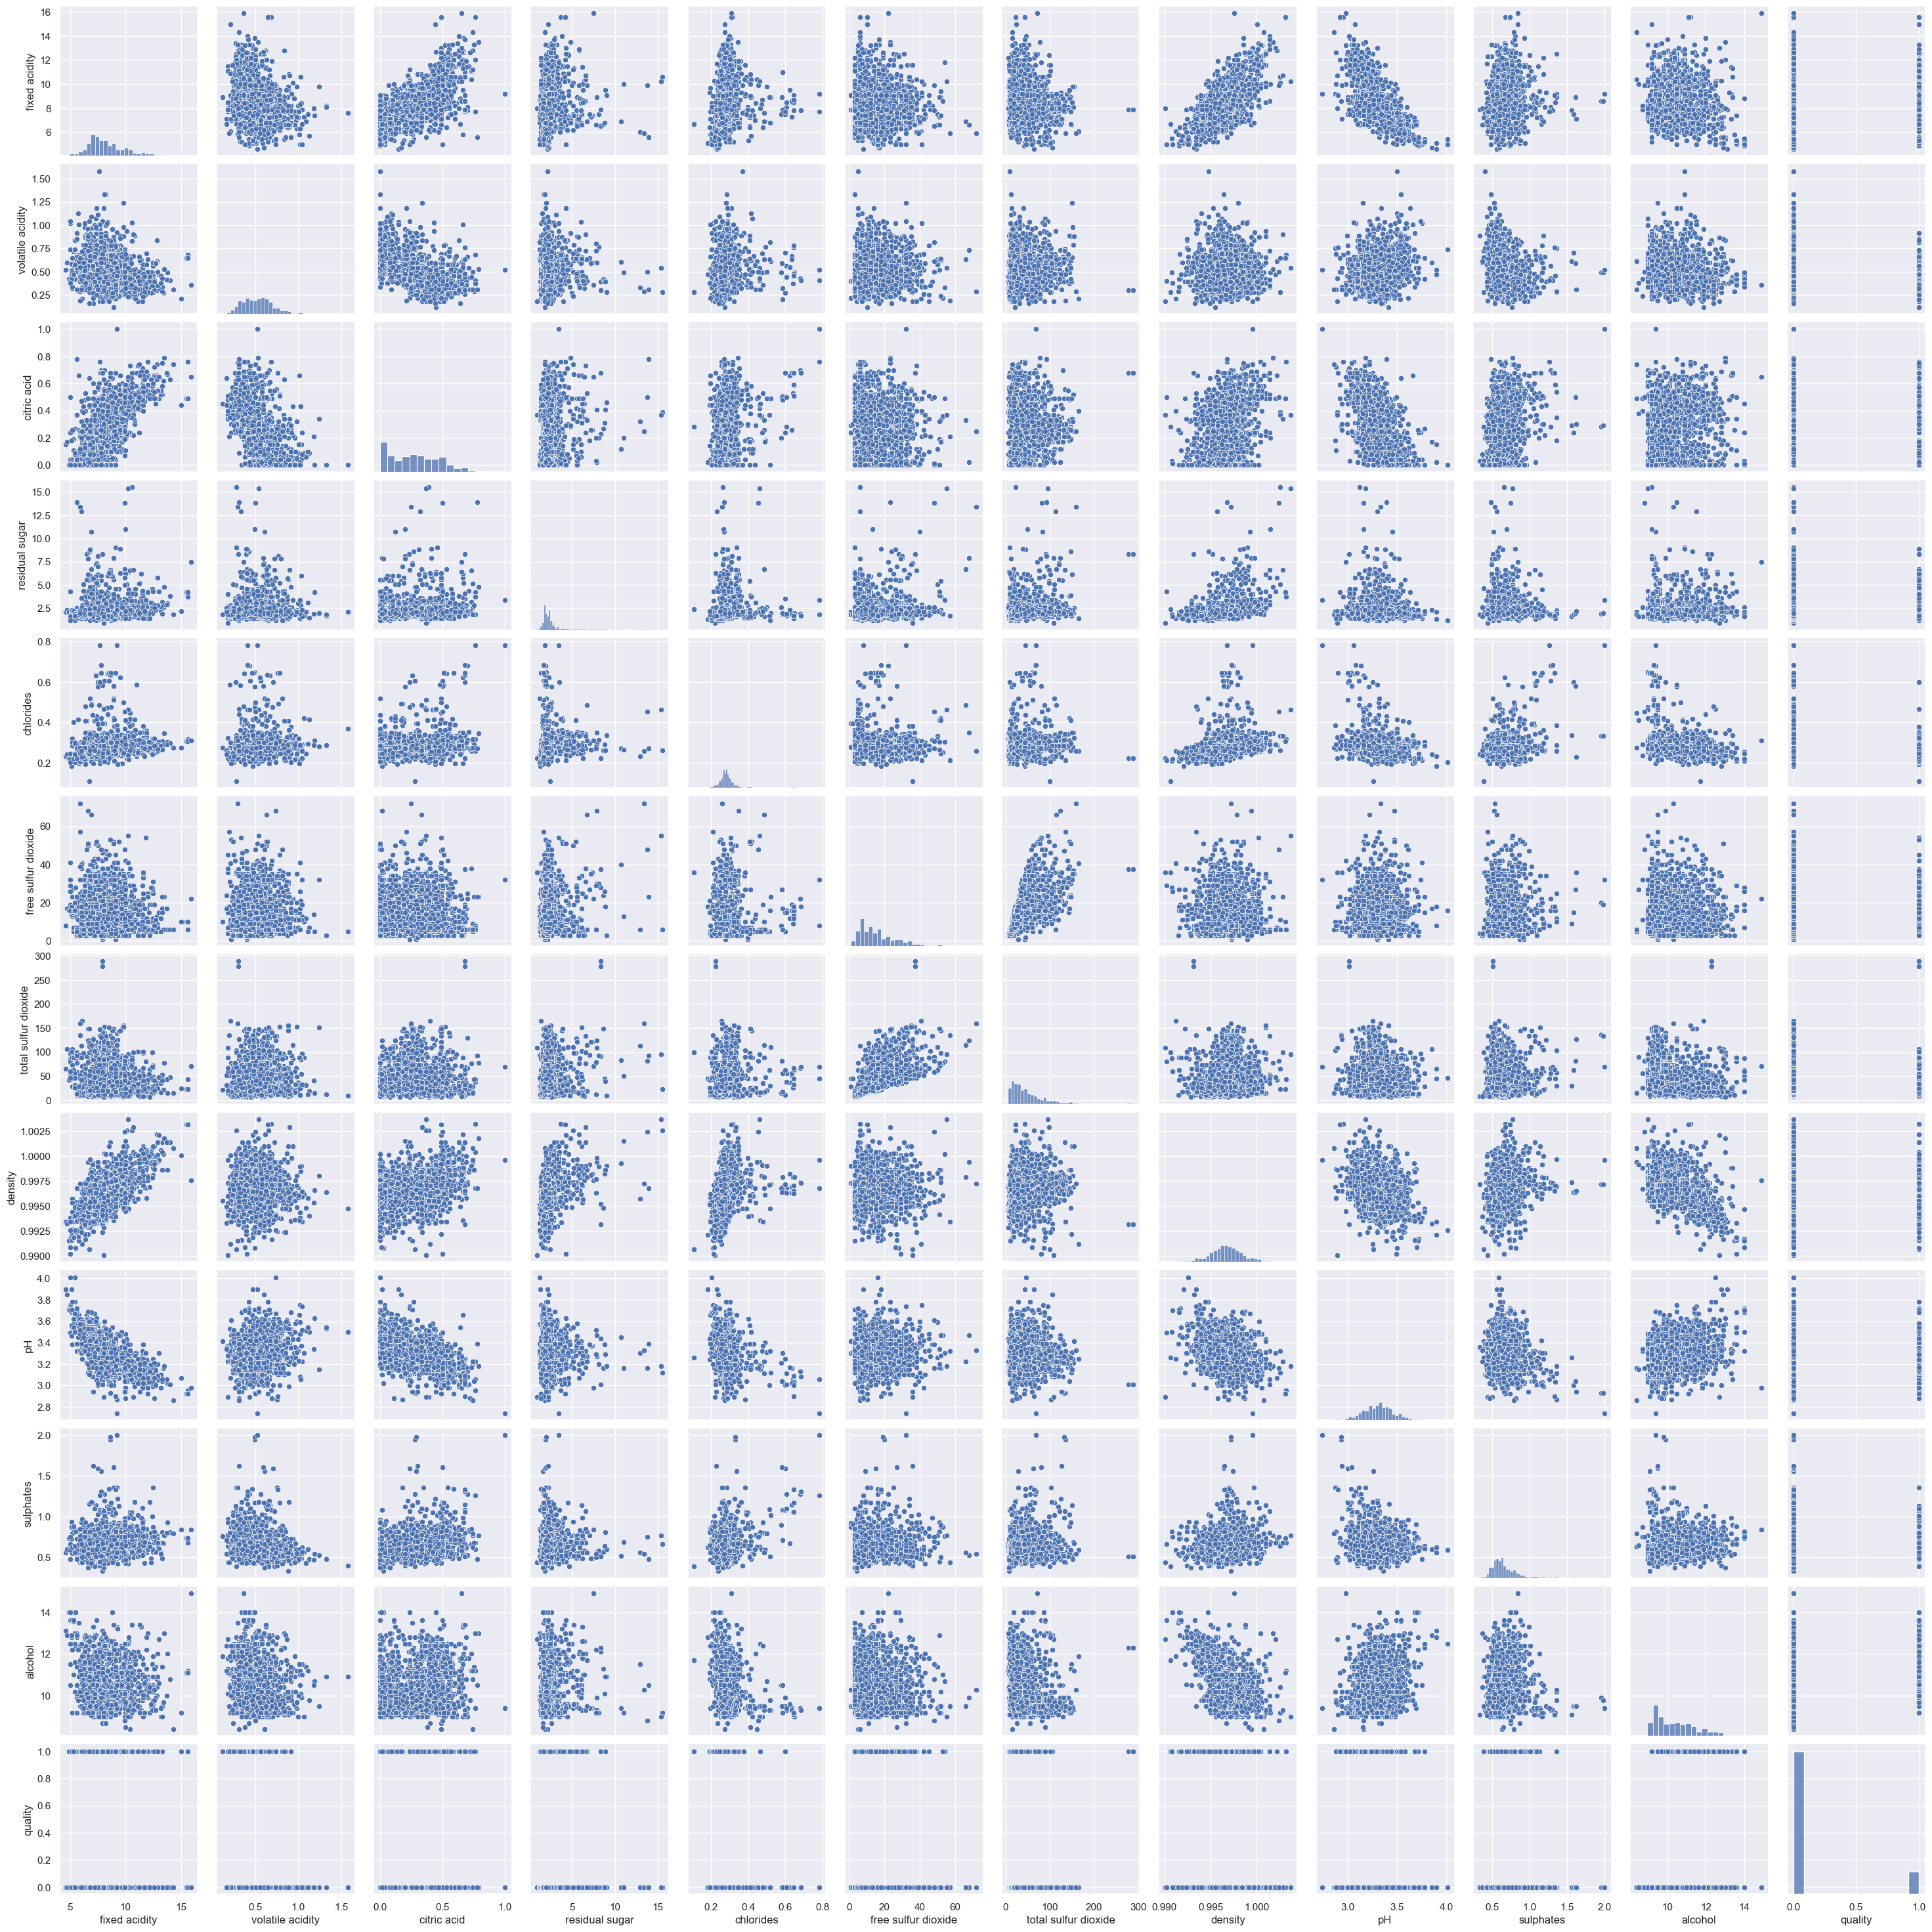

In [87]:
# Visualization with pairplot
plt.figure(figsize=(25,30))
sns.pairplot(df,palette='Dark2')
plt.show()

# Separate Feature and Label

In [43]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [44]:
X.shape

(1359, 11)

In [45]:
Y.shape

(1359,)

In [46]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9   0.275681   
1               7.8             0.880         0.00             2.6   0.313050   
2               7.8             0.760         0.04             2.3   0.303315   
3              11.2             0.280         0.56             1.9   0.273861   
5               7.4             0.660         0.00             1.8   0.273861   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9   0.260768   
1594            6.2             0.600         0.08             2.0   0.300000   
1595            5.9             0.550         0.10             2.2   0.248998   
1597            5.9             0.645         0.12             2.0   0.273861   
1598            6.0             0.310         0.47             3.6   0.258844   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
5         9.4  
...       ...  
1593      9.5  
1594     10.5  
1595     11.2  
1597     10.2  
1598     11.0  

[1359 rows x 11 columns]

# Feature Scaling Using Standard Scaler

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.524431          0.932000    -1.393258       -0.461157  -0.249140   
1         -0.294063          1.915800    -1.393258        0.056665   0.371399   
2         -0.294063          1.259934    -1.188617       -0.165259   0.209748   
3          1.664067         -1.363534     1.471711       -0.461157  -0.279358   
4         -0.524431          0.713378    -1.393258       -0.535132  -0.279358   
...             ...               ...          ...             ...        ...   
1354      -0.869983          0.494756    -0.983977       -0.461157  -0.496783   
1355      -1.215536          0.385444    -0.983977       -0.387183   0.154699   
1356      -1.388312          0.112167    -0.881656       -0.239233  -0.692236   
1357      -1.388312          0.631395    -0.779336       -0.387183  -0.279358   
1358      -1.330720         -1.199567     1.011270        0.796410  -0.528741   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.468554             -0.384050  0.584003  1.291872   
1                0.872003              0.604073  0.048737 -0.708395   
2               -0.085537              0.214813  0.155790 -0.321247   
3                0.105971              0.394471  0.691057 -0.966495   
4               -0.277045             -0.204391  0.584003  1.291872   
...                   ...                   ...       ...       ...   
1354             1.159265             -0.264277 -0.106490  0.711149   
1355             1.542281             -0.084619 -0.968269  0.904724   
1356             2.212559              0.124983 -0.850510  1.356397   
1357             1.542281             -0.084619 -0.663167  1.679021   
1358             0.201725             -0.144505 -0.652461  0.517575   

      sulphates   alcohol  
0     -0.578561 -0.954374  
1      0.124822 -0.584575  
2     -0.051024 -0.584575  
3     -0.461331 -0.584575  
4     -0.578561 -0.954374  
...         ...       ...  
1354   0.945435 -0.861924  
1355  -0.461331  0.062574  
1356   0.593744  0.709723  
1357   0.300667 -0.214775  
1358   0.007591  0.524824  

[1359 rows x 11 columns]

# Checking Variance Inflation Factor(VIF)

In [49]:
# to handle the multicoilarity means two or more ondependent columns highly correlated to each other
from statsmodels.stats.outliers_influence import variance_inflation_factor
multicoil=pd.DataFrame()
multicoil["VIF values"]=[variance_inflation_factor(X.values,col) for col in range(len(X.columns))]
multicoil["Features"]=X.columns
multicoil

VIF values              Features
0     7.880355         fixed acidity
1     1.772649      volatile acidity
2     3.073914           citric acid
3     1.643022        residual sugar
4     1.512181             chlorides
5     1.950041   free sulfur dioxide
6     2.208396  total sulfur dioxide
7     6.367298               density
8     3.415426                    pH
9     1.415057             sulphates
10    3.132400               alcohol

In [50]:
#  Dropping fixed acidity column
X.drop("fixed acidity",axis=1,inplace=True)

In [51]:
# Again check the VIF
multicoil=pd.DataFrame()
multicoil["VIF values"]=[variance_inflation_factor(X.values,col) for col in range(len(X.columns))]
multicoil["Features"]=X.columns
multicoil

VIF values              Features
0    1.764564      volatile acidity
1    2.716877           citric acid
2    1.350187        residual sugar
3    1.415741             chlorides
4    1.926973   free sulfur dioxide
5    2.091877  total sulfur dioxide
6    2.335691               density
7    1.646846                    pH
8    1.375586             sulphates
9    2.158693               alcohol

In [52]:
# Check value count of target variable
Y.value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

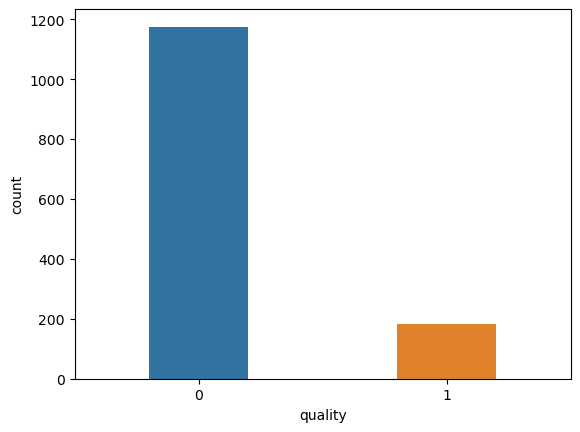

In [62]:
sns.countplot(x='quality',data=df,width=0.4)

In [53]:
# So we see this is imbalanced problem

# Oversampling

In [64]:
# !pip install imblearn

In [65]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(X,Y)

In [67]:
y1.value_counts()

quality
0    1175
1    1175
Name: count, dtype: int64

# Modeling

In [98]:
# finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
Accuracy_max=0
Random_state_max=0
for random in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=random)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy>Accuracy_max:
        Accuracy_max=accuracy
        Random_state_max=random
print(f"Best accuracy is: {Accuracy_max} at random_state: {Random_state_max}")

Best accuracy is: 0.95578231292517 at random_state: 352


In [101]:
# Crearing train test split at random state 235
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=352)

In [102]:
x_train.shape

(1762, 10)

# Classification Algorithm

In [103]:
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

In [104]:
# Cehcking the accuracy with RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
pred_rfc_train=rfc.predict(x_train)
print("Accuracy :",accuracy_score(y_test,pred_rfc))
print("Acuracy on trained data :",accuracy_score(y_train,pred_rfc_train)*100)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

Accuracy : 0.95578231292517
Acuracy on trained data : 100.0
[[280  19]
 [  7 282]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       299
           1       0.94      0.98      0.96       289

    accuracy                           0.96       588
   macro avg       0.96      0.96      0.96       588
weighted avg       0.96      0.96      0.96       588



In [105]:
# Check the accuracy with Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_lr=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("Accuracy :",accuracy_score(y_test,pred_lr))
print("Acuracy on trained data :",accuracy_score(y_train,pred_train)*100)
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy : 0.8452380952380952
Acuracy on trained data : 82.00908059023837
[[251  48]
 [ 43 246]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       299
           1       0.84      0.85      0.84       289

    accuracy                           0.85       588
   macro avg       0.85      0.85      0.85       588
weighted avg       0.85      0.85      0.85       588



In [106]:
# Check the accuracy with SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
pred_svc_train=svc.predict(x_train)
print("Accuracy :",accuracy_score(y_test,pred_svc))
print("Acuracy on trained data :",accuracy_score(y_train,pred_svc_train)*100)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy : 0.8809523809523809
Acuracy on trained data : 88.0249716231555
[[257  42]
 [ 28 261]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       299
           1       0.86      0.90      0.88       289

    accuracy                           0.88       588
   macro avg       0.88      0.88      0.88       588
weighted avg       0.88      0.88      0.88       588



In [107]:
# Checking Accuracy with ExtraTreesClassifier
ext=ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext=ext.predict(x_test)
pred_ext_train=ext.predict(x_train)
print("Accuracy :",accuracy_score(y_test,pred_ext))
print("Acuracy on trained data :",accuracy_score(y_train,pred_ext_train)*100)
print(confusion_matrix(y_test,pred_ext))
print(classification_report(y_test,pred_ext))

Accuracy : 0.967687074829932
Acuracy on trained data : 100.0
[[287  12]
 [  7 282]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       299
           1       0.96      0.98      0.97       289

    accuracy                           0.97       588
   macro avg       0.97      0.97      0.97       588
weighted avg       0.97      0.97      0.97       588



In [108]:
# Checking Accuracy with AdaBoostingClassifier
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
pred_adb=adb.predict(x_test)
pred_adb_train=adb.predict(x_train)
print("Accuracy :",accuracy_score(y_test,pred_adb))
print("Acuracy on trained data :",accuracy_score(y_train,pred_adb_train)*100)
print(confusion_matrix(y_test,pred_adb))
print(classification_report(y_test,pred_adb))

Accuracy : 0.8877551020408163
Acuracy on trained data : 88.87627695800226
[[262  37]
 [ 29 260]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       299
           1       0.88      0.90      0.89       289

    accuracy                           0.89       588
   macro avg       0.89      0.89      0.89       588
weighted avg       0.89      0.89      0.89       588



In [109]:
# Checking Accuracy with GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
pred_gbc_train= gbc.predict(x_train)
print("Accuracy :",accuracy_score(y_test,pred_gbc))
print("Acuracy on trained data :",accuracy_score(y_train,pred_gbc_train)*100)
print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

Accuracy : 0.9166666666666666
Acuracy on trained data : 94.09761634506243
[[271  28]
 [ 21 268]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       299
           1       0.91      0.93      0.92       289

    accuracy                           0.92       588
   macro avg       0.92      0.92      0.92       588
weighted avg       0.92      0.92      0.92       588



In [110]:
# Checking Accuracy with BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
pred_bc_train=bc.predict(x_train)
print("Accuracy :",accuracy_score(y_test,pred_bc))
print("Acuracy on trained data :",accuracy_score(y_train,pred_bc_train)*100)
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

Accuracy : 0.9319727891156463
Acuracy on trained data : 99.60272417707151
[[282  17]
 [ 23 266]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       299
           1       0.94      0.92      0.93       289

    accuracy                           0.93       588
   macro avg       0.93      0.93      0.93       588
weighted avg       0.93      0.93      0.93       588



# Cross Validation Score

In [111]:
# checking cv score for Random Forest Classifier
score=cross_val_score(rfc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :",accuracy_score(y_test,pred_rfc)-score.mean())

[0.94680851 0.89148936 0.94893617 0.87446809 0.90851064]
0.9140425531914893
Difference between Accuracy score and cross validation score is : 0.041739759733680715


In [112]:
# checking cv score for Logistic Regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :",accuracy_score(y_test,pred_lr)-score.mean())

[0.86382979 0.79148936 0.83617021 0.72553191 0.81276596]
0.8059574468085107
Difference between Accuracy score and cross validation score is : 0.039280648429584564


In [113]:
# checking cv score for Gradient Bossting Classifier
score=cross_val_score(gbc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :",accuracy_score(y_test,pred_gbc)-score.mean())

[0.8787234  0.85319149 0.92553191 0.83829787 0.87021277]
0.873191489361702
Difference between Accuracy score and cross validation score is : 0.04347517730496464


In [114]:
# checking cv score for AdaBoost Classifier
score=cross_val_score(adb,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :",accuracy_score(y_test,pred_adb)-score.mean())

[0.86382979 0.82553191 0.90638298 0.80851064 0.83829787]
0.8485106382978724
Difference between Accuracy score and cross validation score is : 0.03924446374294388


In [115]:
# checking cv score for ExtraTrees Classifier
score=cross_val_score(ext,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :",accuracy_score(y_test,pred_ext)-score.mean())

[0.98085106 0.90212766 0.95957447 0.88085106 0.93191489]
0.9310638297872341
Difference between Accuracy score and cross validation score is : 0.03662324504269787


In [116]:
# checking cv score for Support Vector Classifier
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :",accuracy_score(y_test,pred_svc)-score.mean())

[0.91489362 0.82553191 0.8893617  0.80851064 0.84680851]
0.8570212765957447
Difference between Accuracy score and cross validation score is : 0.023931104356636257


In [117]:
''' here after the model accuracy check with cross validation score.
we see the ExtraTreesClassifier best for hyper parameter tuning.
'''

' here after the model accuracy check with cross validation score.\nwe see the ExtraTreesClassifier best for hyper parameter tuning.\n'

In [118]:
from sklearn.model_selection import GridSearchCV
parameters={
    'criterion':['gini','entropy'],
    'random_state':[10,20,40,60,80,100],
    'max_depth':[0,10,20,30,40,50],
    'n_jobs':[-2,-1,1,2,3,4],
    'n_estimators':[20,40,50,100,150,200]
}

In [119]:
gcv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 30, 40, 50],
                         'n_estimators': [20, 40, 50, 100, 150, 200],
                         'n_jobs': [-2, -1, 1, 2, 3, 4],
                         'random_state': [10, 20, 40, 60, 80, 100]})

In [120]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 20}

In [121]:
final_model=ExtraTreesClassifier(criterion='gini',max_depth=30,n_estimators=200,n_jobs=-2,random_state=200)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

96.42857142857143


# Roc Curve

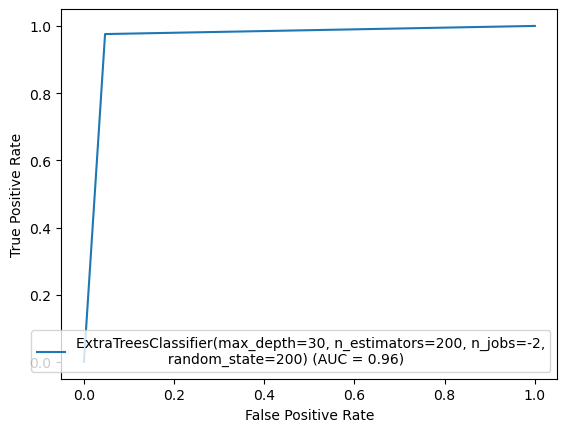

In [122]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

# Save the model

In [123]:
# Saving the model using .pkl
import joblib
joblib.dump(final_model,"Red Wine Quality.pkl")

['Red Wine Quality.pkl']

In [124]:
# lets load the saved model and get the predictions
model=joblib.load("Red Wine Quality.pkl")

# prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [125]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df 

Predicted  Original
0            1         1
1            1         1
2            1         1
3            0         0
4            0         0
..         ...       ...
583          1         1
584          0         1
585          1         1
586          0         0
587          0         0

[588 rows x 2 columns]